In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]
select_columns_bool = False
select_labels = ["raw","MINERVA","Refactor","SmartSVA"]

phen = "antibiotic"
phen_type = "class"
not_rotate = False
data_type = "kmer"
trans = "clr_scale"
numPc =  [0,0,0,0,10,10,1] # [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,120,140]
folder_names = ['Hispanic_k6' for i in range(len(numPc))]
file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first10filter_TRUE','refactor_protect_first10filter_TRUE','minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["6" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"

    title = 'Pearson correlation of predicted body mass index (BMI)'# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = "BMI prediction" #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    metric_word =  'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = "Random Forest"##"Random Forest"#'Regression'#"Random Forest"

    title = 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = "Antibiotic history class prediction" #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
folder_names

['Hispanic_k6',
 'Hispanic_k6',
 'Hispanic_k6',
 'Hispanic_k6',
 'Hispanic_k6',
 'Hispanic_k6',
 'Hispanic_k6']

In [5]:
df_metric = pd.DataFrame()

In [6]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'ComBatfilter_TRUE_trans_clr_scale',
 'bmcfilter_TRUE_trans_clr_scale',
 'limmafilter_TRUE_trans_clr_scale',
 'smartsva_first10filter_TRUE_trans_clr_scale',
 'refactor_protect_first10filter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale']

In [7]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        filename_temp = data_folder + folder_names[f] +"/cont_pred/"+ data_type + "_BatchCorrected_" + phen + "_"+ file_names[f] + "_pearson_and_mse.pkl"
      
    else:
        filename_temp = data_folder + folder_names[f] +"/class_pred/"+ data_type + "_BatchCorrected_"+ phen + "_" + file_names[f] + "_classification_auc.pkl"
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        index = file_names[f]
        if metric_word == "auc_all":
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

In [8]:
filename_temp

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/Hispanic_k6/class_pred/kmer_BatchCorrected_antibiotic_minerva_first1filter_TRUE_trans_clr_scale_classification_auc.pkl'

In [9]:
df_metric

,rawfilter_TRUE_trans_clr_scale,ComBatfilter_TRUE_trans_clr_scale,bmcfilter_TRUE_trans_clr_scale,limmafilter_TRUE_trans_clr_scale,smartsva_first10filter_TRUE_trans_clr_scale,refactor_protect_first10filter_TRUE_trans_clr_scale,minerva_first1filter_TRUE_trans_clr_scale
0,0.532490,0.575173,0.590341,0.553270,0.562371,0.537283,0.560217
1,0.602293,0.632872,0.593921,0.619251,0.572079,0.486106,0.561643
2,0.623537,0.510732,0.600030,0.546524,0.564695,0.597195,0.551890
3,0.583780,0.570244,0.584268,0.615793,0.542744,0.600183,0.652683
4,0.561951,0.543780,0.566829,0.585488,0.512622,0.570305,0.573720
5,0.543987,0.532702,0.566618,0.558670,0.580330,0.599927,0.552481
6,0.571138,0.592373,0.556850,0.569652,0.566800,0.521053,0.593496
7,0.552195,0.538262,0.462012,0.497683,0.535427,0.541280,0.576037
8,0.629817,0.569939,0.599024,0.582805,0.595610,0.562104,0.587622
9,0.535030,0.612317,0.593720,0.591250,0.493872,0.531311,0.590000


In [10]:
df_metric.columns
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

Index(['rawfilter_TRUE_trans_clr_scale', 'ComBatfilter_TRUE_trans_clr_scale',
       'bmcfilter_TRUE_trans_clr_scale', 'limmafilter_TRUE_trans_clr_scale',
       'smartsva_first10filter_TRUE_trans_clr_scale',
       'refactor_protect_first10filter_TRUE_trans_clr_scale',
       'minerva_first1filter_TRUE_trans_clr_scale'],
      dtype='object')

In [11]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'ComBatfilter_TRUE_trans_clr_scale',
 'bmcfilter_TRUE_trans_clr_scale',
 'limmafilter_TRUE_trans_clr_scale',
 'smartsva_first10filter_TRUE_trans_clr_scale',
 'refactor_protect_first10filter_TRUE_trans_clr_scale',
 'minerva_first1filter_TRUE_trans_clr_scale']

In [12]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

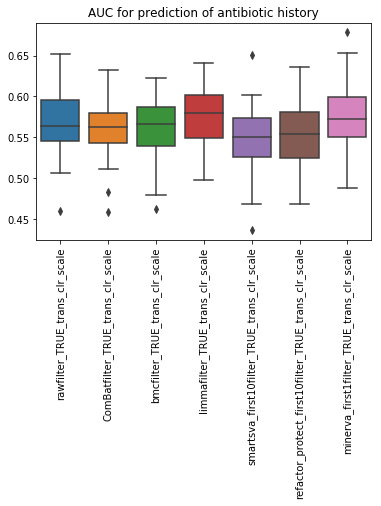

In [13]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.2, 1))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans + '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + str(numPc) + "_" + trans +  '_boxplots_' + classifier + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [14]:
select_columns_bool

False

In [15]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'